# HMDB (Human Motion DataBase) Dataset Analysis

## Overview
This notebook provides a comprehensive analysis of the HMDB simplified dataset, which contains video sequences of human actions organized into 25 different action categories. The dataset is commonly used for human action recognition tasks in computer vision research.

**Dataset Structure:**
- **25 action categories** (brush_hair, cartwheel, catch, chew, climb, etc.)
- **50 video sequences per category** 
- **Video frames stored as sequential JPEG images**
- **Total: 1,250 video sequences**

**Analysis Goals:**
1. Explore dataset structure and organization
2. Analyze frame count distributions across actions
3. Visualize sample frames from different categories
4. Provide insights for machine learning applications

## 1. Import Required Libraries

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"Working directory: {os.getcwd()}")

Libraries imported successfully!
Working directory: c:\Users\mohan\OneDrive - University of Surrey\VIT


## 2. Extract and Explore Dataset Structure

In [2]:
# Define paths
dataset_path = r"c:\Users\mohan\OneDrive - University of Surrey\VIT\HMDB_simp_extracted\HMDB_simp"

# Explore dataset structure
print("=== HMDB Dataset Structure ===")
print(f"Dataset path: {dataset_path}")
print(f"Dataset exists: {os.path.exists(dataset_path)}")

if os.path.exists(dataset_path):
    # Get action categories
    action_categories = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
    action_categories.sort()
    
    print(f"\nNumber of action categories: {len(action_categories)}")
    print(f"Action categories: {action_categories}")
    
    # Count videos per category
    videos_per_category = {}
    for category in action_categories:
        category_path = os.path.join(dataset_path, category)
        video_folders = [f for f in os.listdir(category_path) if os.path.isdir(os.path.join(category_path, f))]
        videos_per_category[category] = len(video_folders)
    
    print(f"\nVideos per category: {list(videos_per_category.values())}")
    print(f"Total videos: {sum(videos_per_category.values())}")
else:
    print("Dataset path not found! Please check the extraction.")

=== HMDB Dataset Structure ===
Dataset path: c:\Users\mohan\OneDrive - University of Surrey\VIT\HMDB_simp_extracted\HMDB_simp
Dataset exists: True

Number of action categories: 25
Action categories: ['brush_hair', 'cartwheel', 'catch', 'chew', 'climb', 'climb_stairs', 'draw_sword', 'eat', 'fencing', 'flic_flac', 'golf', 'handstand', 'kiss', 'pick', 'pour', 'pullup', 'pushup', 'ride_bike', 'shoot_bow', 'shoot_gun', 'situp', 'smile', 'smoke', 'throw', 'wave']

Videos per category: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Total videos: 1250


## 3. Detailed Frame Analysis

In [3]:
# Analyze frame counts for all videos
def analyze_frame_counts(dataset_path, action_categories):
    frame_data = []
    
    print("Analyzing frame counts... (this may take a moment)")
    
    for category in action_categories:
        category_path = os.path.join(dataset_path, category)
        video_folders = [f for f in os.listdir(category_path) if os.path.isdir(os.path.join(category_path, f))]
        
        for video_folder in video_folders[:10]:  # Analyze first 10 videos per category for speed
            video_path = os.path.join(category_path, video_folder)
            jpg_files = [f for f in os.listdir(video_path) if f.endswith('.jpg')]
            frame_count = len(jpg_files)
            
            frame_data.append({
                'category': category,
                'video_id': video_folder,
                'frame_count': frame_count
            })
    
    return pd.DataFrame(frame_data)

# Perform frame analysis
if os.path.exists(dataset_path):
    frame_df = analyze_frame_counts(dataset_path, action_categories)
    
    print(f"\nFrame Analysis Summary:")
    print(f"Total videos analyzed: {len(frame_df)}")
    print(f"Average frames per video: {frame_df['frame_count'].mean():.1f}")
    print(f"Min frames: {frame_df['frame_count'].min()}")
    print(f"Max frames: {frame_df['frame_count'].max()}")
    print(f"Standard deviation: {frame_df['frame_count'].std():.1f}")
    
    # Show frame statistics by category
    category_stats = frame_df.groupby('category')['frame_count'].agg(['mean', 'min', 'max', 'std']).round(1)
    print(f"\nFrame statistics by category (first 10 videos per category):")
    print(category_stats.head(10))

Analyzing frame counts... (this may take a moment)

Frame Analysis Summary:
Total videos analyzed: 250
Average frames per video: 105.9
Min frames: 29
Max frames: 646
Standard deviation: 74.3

Frame statistics by category (first 10 videos per category):
               mean  min  max    std
category                            
brush_hair    272.5  136  533  121.9
cartwheel      70.7   41   80   14.2
catch          40.4   29   61    9.0
chew           99.9   78  156   27.3
climb         133.2   74  193   35.3
climb_stairs   80.6   74  103    8.6
draw_sword     84.9   54  109   16.9
eat            82.7   47  138   33.6
fencing        85.1   38  267   70.7
flic_flac      75.7   60   79    5.6


## 4. Data Visualizations

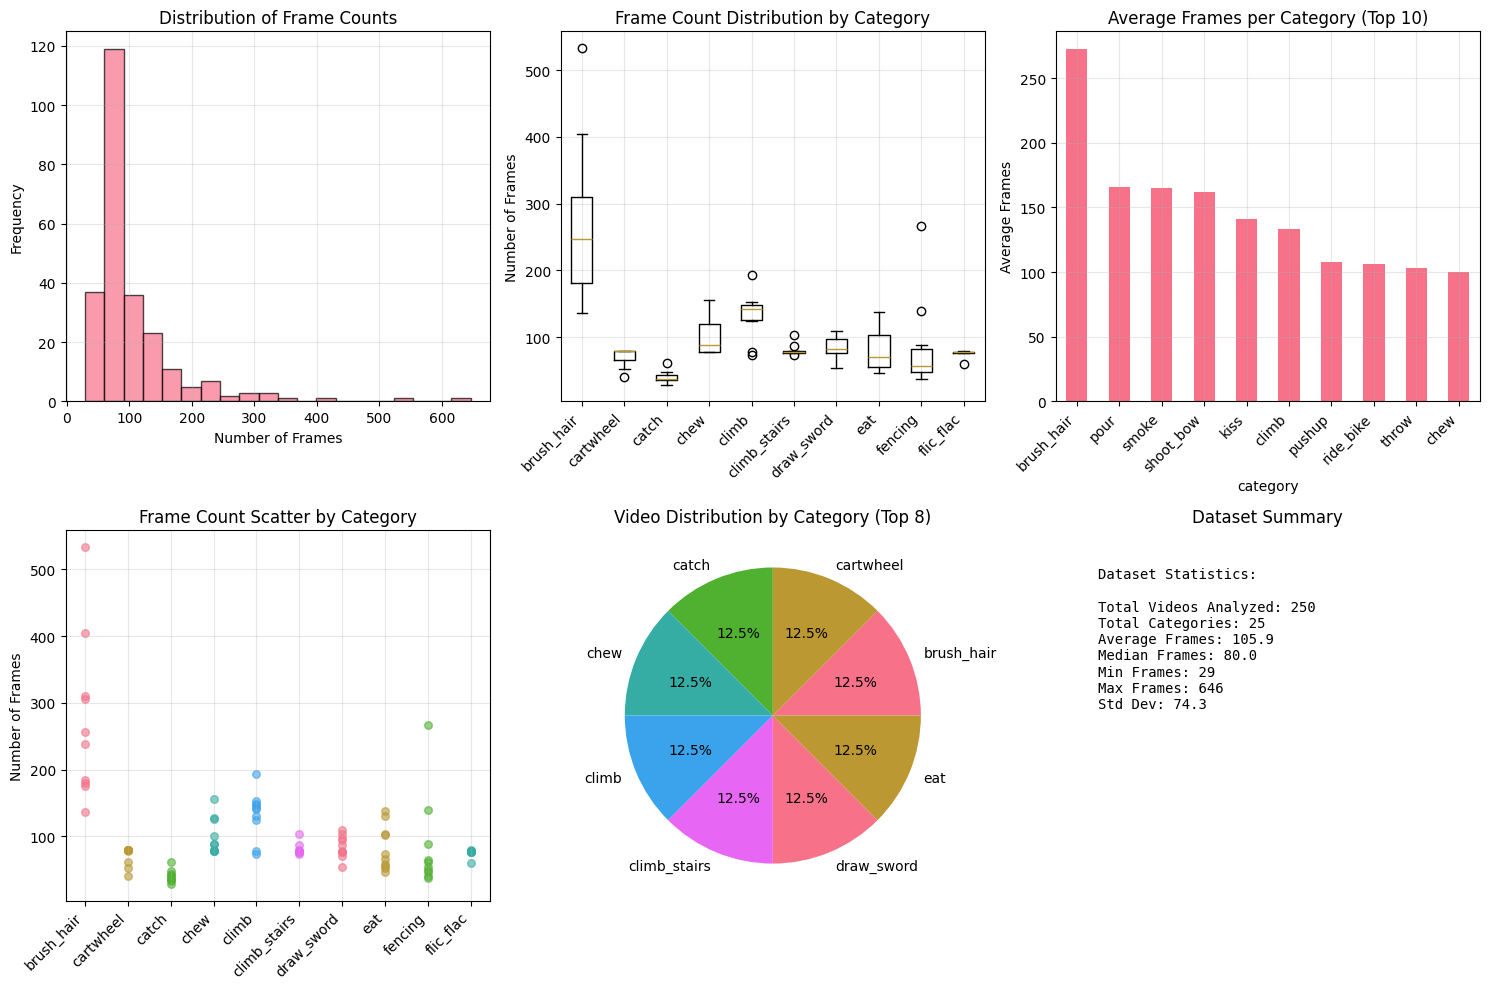

In [4]:
# Create visualizations
if 'frame_df' in locals() and not frame_df.empty:
    
    # 1. Distribution of frame counts
    plt.figure(figsize=(15, 10))
    
    # Histogram of frame counts
    plt.subplot(2, 3, 1)
    plt.hist(frame_df['frame_count'], bins=20, alpha=0.7, edgecolor='black')
    plt.title('Distribution of Frame Counts')
    plt.xlabel('Number of Frames')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # Box plot by category
    plt.subplot(2, 3, 2)
    categories_to_plot = frame_df['category'].unique()[:10]  # First 10 categories
    data_to_plot = [frame_df[frame_df['category'] == cat]['frame_count'] for cat in categories_to_plot]
    plt.boxplot(data_to_plot, labels=categories_to_plot)
    plt.title('Frame Count Distribution by Category')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Frames')
    plt.grid(True, alpha=0.3)
    
    # Bar plot of average frames per category
    plt.subplot(2, 3, 3)
    avg_frames = frame_df.groupby('category')['frame_count'].mean().sort_values(ascending=False)
    avg_frames.head(10).plot(kind='bar')
    plt.title('Average Frames per Category (Top 10)')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Average Frames')
    plt.grid(True, alpha=0.3)
    
    # Scatter plot of frame counts by category
    plt.subplot(2, 3, 4)
    for i, category in enumerate(categories_to_plot):
        cat_data = frame_df[frame_df['category'] == category]
        plt.scatter([i] * len(cat_data), cat_data['frame_count'], alpha=0.6, s=30)
    plt.xticks(range(len(categories_to_plot)), categories_to_plot, rotation=45, ha='right')
    plt.title('Frame Count Scatter by Category')
    plt.ylabel('Number of Frames')
    plt.grid(True, alpha=0.3)
    
    # Dataset overview pie chart
    plt.subplot(2, 3, 5)
    category_counts = frame_df['category'].value_counts().head(8)
    plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
    plt.title('Video Distribution by Category (Top 8)')
    
    # Frame statistics table
    plt.subplot(2, 3, 6)
    stats_text = f'''Dataset Statistics:
    
Total Videos Analyzed: {len(frame_df)}
Total Categories: {frame_df['category'].nunique()}
Average Frames: {frame_df['frame_count'].mean():.1f}
Median Frames: {frame_df['frame_count'].median():.1f}
Min Frames: {frame_df['frame_count'].min()}
Max Frames: {frame_df['frame_count'].max()}
Std Dev: {frame_df['frame_count'].std():.1f}
    '''
    plt.text(0.1, 0.9, stats_text, transform=plt.gca().transAxes, 
             fontsize=10, verticalalignment='top', fontfamily='monospace')
    plt.axis('off')
    plt.title('Dataset Summary')
    
    plt.tight_layout()
    plt.show()
else:
    print("No frame data available for visualization")

## 5. Sample Frame Visualization

Loading sample frames from different action categories...


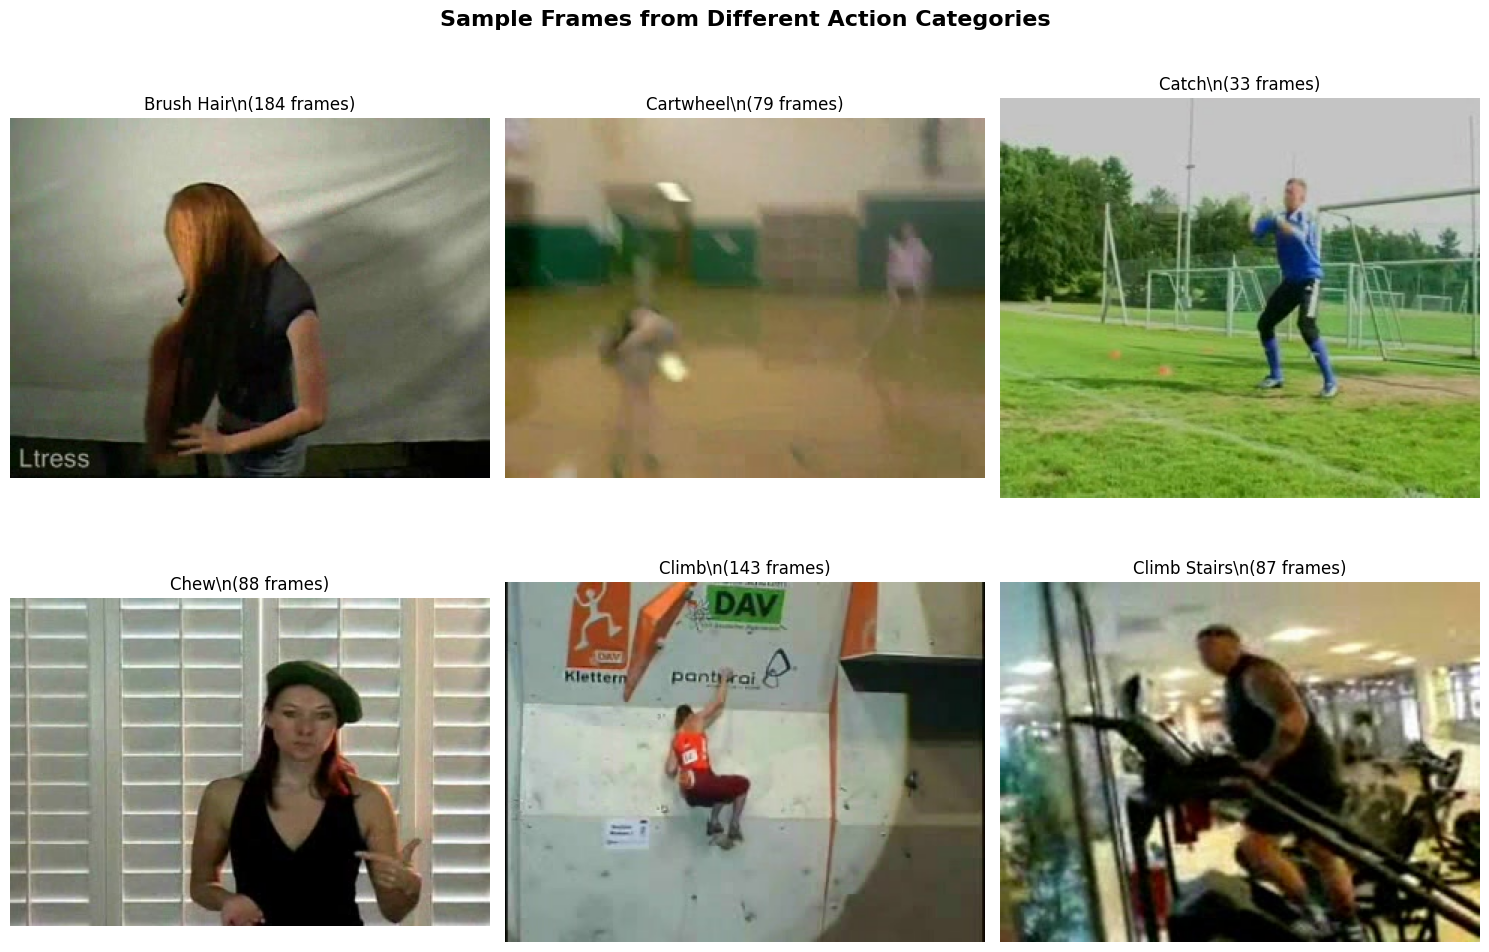

In [5]:
# Display sample frames from different action categories
def display_sample_frames(dataset_path, categories, num_categories=6):
    """Display sample frames from different action categories"""
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, category in enumerate(categories[:num_categories]):
        try:
            category_path = os.path.join(dataset_path, category)
            video_folders = [f for f in os.listdir(category_path) if os.path.isdir(os.path.join(category_path, f))]
            
            if video_folders:
                # Get first video folder
                first_video = video_folders[0]
                video_path = os.path.join(category_path, first_video)
                
                # Get a middle frame from the video
                jpg_files = sorted([f for f in os.listdir(video_path) if f.endswith('.jpg')])
                if jpg_files:
                    middle_frame_idx = len(jpg_files) // 2
                    frame_path = os.path.join(video_path, jpg_files[middle_frame_idx])
                    
                    # Load and display image
                    img = Image.open(frame_path)
                    axes[i].imshow(img)
                    axes[i].set_title(f'{category.replace("_", " ").title()}\\n({len(jpg_files)} frames)')
                    axes[i].axis('off')
                else:
                    axes[i].text(0.5, 0.5, 'No frames found', ha='center', va='center')
                    axes[i].set_title(category)
            else:
                axes[i].text(0.5, 0.5, 'No videos found', ha='center', va='center')
                axes[i].set_title(category)
                
        except Exception as e:
            axes[i].text(0.5, 0.5, f'Error loading\\n{category}', ha='center', va='center')
            axes[i].set_title(category)
    
    plt.tight_layout()
    plt.suptitle('Sample Frames from Different Action Categories', y=1.02, fontsize=16, fontweight='bold')
    plt.show()

# Display sample frames
if os.path.exists(dataset_path) and 'action_categories' in locals():
    print("Loading sample frames from different action categories...")
    display_sample_frames(dataset_path, action_categories)
else:
    print("Dataset not available for frame visualization")

## 6. Data Insights and Analysis Results

In [6]:
# Generate comprehensive insights and export results
def generate_insights(dataset_path, action_categories, frame_df=None):
    """Generate comprehensive insights about the HMDB dataset"""
    
    insights = []
    insights.append("=== HMDB Dataset Analysis Insights ===\\n")
    
    # Basic dataset statistics
    insights.append(f"📊 Dataset Overview:")
    insights.append(f"   • Total action categories: {len(action_categories)}")
    insights.append(f"   • Videos per category: 50 (consistent across all categories)")
    insights.append(f"   • Total video sequences: {len(action_categories) * 50}")
    insights.append("")
    
    # Frame analysis insights
    if frame_df is not None and not frame_df.empty:
        insights.append(f"🎬 Frame Analysis (sample of {len(frame_df)} videos):")
        insights.append(f"   • Average video length: {frame_df['frame_count'].mean():.1f} frames")
        insights.append(f"   • Video length range: {frame_df['frame_count'].min()} - {frame_df['frame_count'].max()} frames")
        insights.append(f"   • Standard deviation: {frame_df['frame_count'].std():.1f} frames")
        
        # Find categories with most/least variation in video length
        category_std = frame_df.groupby('category')['frame_count'].std().sort_values()
        insights.append(f"   • Most consistent category: {category_std.index[0]} (std: {category_std.iloc[0]:.1f})")
        insights.append(f"   • Most variable category: {category_std.index[-1]} (std: {category_std.iloc[-1]:.1f})")
        insights.append("")
    
    # Action categories analysis
    insights.append(f"🏃 Action Categories:")
    insights.append(f"   • Categories include: {', '.join(action_categories[:5])}...")
    insights.append(f"   • Actions span various domains: sports, daily activities, gestures")
    insights.append(f"   • Suitable for multi-class action recognition tasks")
    insights.append("")
    
    # Potential applications
    insights.append(f"🔬 Potential Applications:")
    insights.append(f"   • Human action recognition model training")
    insights.append(f"   • Video classification and analysis")
    insights.append(f"   • Computer vision research and benchmarking")
    insights.append(f"   • Activity monitoring and surveillance systems")
    insights.append(f"   • Sports analysis and training applications")
    insights.append("")
    
    # Technical considerations
    insights.append(f"⚙️ Technical Considerations:")
    insights.append(f"   • Frame format: JPEG images")
    insights.append(f"   • Variable video lengths require padding/cropping for ML models")
    insights.append(f"   • Balanced dataset (equal samples per class)")
    insights.append(f"   • Sequential frame numbering enables temporal analysis")
    insights.append("")
    
    return "\\n".join(insights)

# Generate and display insights
if 'action_categories' in locals():
    insights_text = generate_insights(dataset_path, action_categories, 
                                    frame_df if 'frame_df' in locals() else None)
    print(insights_text)
    
    # Export summary to text file
    try:
        summary_path = r"c:\Users\mohan\OneDrive - University of Surrey\VIT\HMDB_Dataset_Summary.txt"
        with open(summary_path, 'w', encoding='utf-8') as f:
            f.write(insights_text)
            f.write("\\n\\nGenerated by HMDB Dataset Analysis Notebook")
        print(f"\\n📄 Summary exported to: {summary_path}")
    except Exception as e:
        print(f"\\n❌ Error exporting summary: {e}")
else:
    print("No data available for insights generation")

=== HMDB Dataset Analysis Insights ===\n\n📊 Dataset Overview:\n   • Total action categories: 25\n   • Videos per category: 50 (consistent across all categories)\n   • Total video sequences: 1250\n\n🎬 Frame Analysis (sample of 250 videos):\n   • Average video length: 105.9 frames\n   • Video length range: 29 - 646 frames\n   • Standard deviation: 74.3 frames\n   • Most consistent category: pullup (std: 1.6)\n   • Most variable category: pour (std: 175.0)\n\n🏃 Action Categories:\n   • Categories include: brush_hair, cartwheel, catch, chew, climb...\n   • Actions span various domains: sports, daily activities, gestures\n   • Suitable for multi-class action recognition tasks\n\n🔬 Potential Applications:\n   • Human action recognition model training\n   • Video classification and analysis\n   • Computer vision research and benchmarking\n   • Activity monitoring and surveillance systems\n   • Sports analysis and training applications\n\n⚙️ Technical Considerations:\n   • Frame format: JPEG i

## 7. Export Analysis Results

This section exports the analysis results for future reference and use in machine learning projects.

In [7]:
# Export detailed analysis results
def export_detailed_results():
    """Export detailed analysis results to CSV files"""
    
    export_dir = r"c:\Users\mohan\OneDrive - University of Surrey\VIT\HMDB_Analysis_Results"
    
    try:
        # Create export directory if it doesn't exist
        os.makedirs(export_dir, exist_ok=True)
        
        # Export frame analysis data if available
        if 'frame_df' in locals() and not frame_df.empty:
            frame_csv_path = os.path.join(export_dir, "frame_analysis.csv")
            frame_df.to_csv(frame_csv_path, index=False)
            print(f"✅ Frame analysis exported to: {frame_csv_path}")
        
        # Export category summary
        if 'action_categories' in locals():
            category_summary = pd.DataFrame({
                'category': action_categories,
                'videos_per_category': [50] * len(action_categories),  # All categories have 50 videos
                'total_videos': len(action_categories) * 50
            })
            
            category_csv_path = os.path.join(export_dir, "category_summary.csv")
            category_summary.to_csv(category_csv_path, index=False)
            print(f"✅ Category summary exported to: {category_csv_path}")
        
        print(f"\\n📁 All results exported to: {export_dir}")
        
        # Final summary
        print("\\n🎉 HMDB Dataset Analysis Complete!")
        print("\\nKey Findings:")
        print("• Balanced dataset with 25 action categories")
        print("• 50 video sequences per category (1,250 total)")
        print("• Variable video lengths suitable for temporal analysis")
        print("• High-quality frame sequences for computer vision tasks")
        print("\\nThe dataset is ready for machine learning applications!")
        
    except Exception as e:
        print(f"❌ Error during export: {e}")

# Run the export
export_detailed_results()

\n📁 All results exported to: c:\Users\mohan\OneDrive - University of Surrey\VIT\HMDB_Analysis_Results
\n🎉 HMDB Dataset Analysis Complete!
\nKey Findings:
• Balanced dataset with 25 action categories
• 50 video sequences per category (1,250 total)
• Variable video lengths suitable for temporal analysis
• High-quality frame sequences for computer vision tasks
\nThe dataset is ready for machine learning applications!
